# Evaluating the Models

Using the evaluation.csv file created in `./head2head_eval.py` we will evaluate the models and compare their performance. This will be done in the following stages:

1. Exploratory analysis of the evaluation results.
2. Verifying the results by manually inspecting the predictions.
3. Comparison of the models specifically using their evaluation metrics.
4. Visualizing the predictions to understand the models' performance.
5. Conclusion and final thoughts.

In [1]:
import pandas as pd

df = pd.read_csv('data/overall_evaluation.csv', na_filter=False)
df.head(3)

,question,answer_A,type_A,answer_B,type_B,true_answer,question_type,prompt,best_response
0,What is the deadline for transfer students to ...,The deadline for transfer students to apply fo...,RAG,Transfer students have until August 15th to ap...,Finetuned,The deadline for transfer students to apply fo...,test,"[{'role': 'system', 'content': 'You are a help...",None
1,Who is authorized to request verification of i...,"I'm sorry, I don't know.",RAG,Verification of identity can be requested by a...,Finetuned,University Police Officers have the authority ...,train,"[{'role': 'system', 'content': 'You are a help...",None
2,What does a probationary appointment at SUNY B...,A probationary appointment at SUNY Brockport i...,RAG,A probationary appointment at SUNY Brockport m...,Finetuned,A probationary appointment at SUNY Brockport i...,train,"[{'role': 'system', 'content': 'You are a help...",A


In [2]:
df

,question,answer_A,type_A,answer_B,type_B,true_answer,question_type,prompt,best_response
0,What is the deadline for transfer students to ...,The deadline for transfer students to apply fo...,RAG,Transfer students have until August 15th to ap...,Finetuned,The deadline for transfer students to apply fo...,test,"[{'role': 'system', 'content': 'You are a help...",None
1,Who is authorized to request verification of i...,"I'm sorry, I don't know.",RAG,Verification of identity can be requested by a...,Finetuned,University Police Officers have the authority ...,train,"[{'role': 'system', 'content': 'You are a help...",None
2,What does a probationary appointment at SUNY B...,A probationary appointment at SUNY Brockport i...,RAG,A probationary appointment at SUNY Brockport m...,Finetuned,A probationary appointment at SUNY Brockport i...,train,"[{'role': 'system', 'content': 'You are a help...",A
3,What characteristics do you seek in a Peer Men...,The characteristics sought in a Peer Mentor in...,RAG,We look for individuals who embody our values ...,Finetuned,We're excited to find Peer Mentors who are pro...,train,"[{'role': 'system', 'content': 'You are a help...",B
4,What are some effective strategies for prepari...,Research the company or organization you are i...,RAG,"Preparation is key! Research the position, com...",Finetuned,To prepare effectively for an interview at SUN...,test,"[{'role': 'system', 'content': 'You are a help...",A
...,...,...,...,...,...,...,...,...,...
6973,Are there any internships available in the fie...,Absolutely! SUNY Brockport offers a variety of...,Scratch,Absolutely! SUNY Brockport offers various inte...,Finetuned,Absolutely! SUNY Brockport provides a wealth o...,test,"[{'role': 'system', 'content': 'You are a help...",B
6974,How can I view the Group Exercise Schedule?,You can view the group exercise classes by vis...,Scratch,"To view the Group Exercise Schedule, simply vi...",Finetuned,You can view our Group Exercise Schedule by vi...,test,"[{'role': 'system', 'content': 'You are a help...",B
6975,Where can I get help with my resume and cover ...,"For your internship placement, you can contact...",Scratch,For assistance with your resume and cover lett...,Finetuned,You can get professional help with your resume...,test,"[{'role': 'system', 'content': 'You are a help...",B
6976,"How do I enroll in the Equity, Diversity, and ...",Were thrilled to hear youre interested in join...,Scratch,"To enroll in the Equity, Diversity, and Inclus...",Finetuned,We're thrilled to hear about your interest! Yo...,train,"[{'role': 'system', 'content': 'You are a help...",B


In [3]:
# df = df[(df['answer_A'] != "I'm sorry, I don't know.") & (df['answer_B'] != "I'm sorry, I don't know.")]

In [4]:
df

,question,answer_A,type_A,answer_B,type_B,true_answer,question_type,prompt,best_response
0,What is the deadline for transfer students to ...,The deadline for transfer students to apply fo...,RAG,Transfer students have until August 15th to ap...,Finetuned,The deadline for transfer students to apply fo...,test,"[{'role': 'system', 'content': 'You are a help...",None
1,Who is authorized to request verification of i...,"I'm sorry, I don't know.",RAG,Verification of identity can be requested by a...,Finetuned,University Police Officers have the authority ...,train,"[{'role': 'system', 'content': 'You are a help...",None
2,What does a probationary appointment at SUNY B...,A probationary appointment at SUNY Brockport i...,RAG,A probationary appointment at SUNY Brockport m...,Finetuned,A probationary appointment at SUNY Brockport i...,train,"[{'role': 'system', 'content': 'You are a help...",A
3,What characteristics do you seek in a Peer Men...,The characteristics sought in a Peer Mentor in...,RAG,We look for individuals who embody our values ...,Finetuned,We're excited to find Peer Mentors who are pro...,train,"[{'role': 'system', 'content': 'You are a help...",B
4,What are some effective strategies for prepari...,Research the company or organization you are i...,RAG,"Preparation is key! Research the position, com...",Finetuned,To prepare effectively for an interview at SUN...,test,"[{'role': 'system', 'content': 'You are a help...",A
...,...,...,...,...,...,...,...,...,...
6973,Are there any internships available in the fie...,Absolutely! SUNY Brockport offers a variety of...,Scratch,Absolutely! SUNY Brockport offers various inte...,Finetuned,Absolutely! SUNY Brockport provides a wealth o...,test,"[{'role': 'system', 'content': 'You are a help...",B
6974,How can I view the Group Exercise Schedule?,You can view the group exercise classes by vis...,Scratch,"To view the Group Exercise Schedule, simply vi...",Finetuned,You can view our Group Exercise Schedule by vi...,test,"[{'role': 'system', 'content': 'You are a help...",B
6975,Where can I get help with my resume and cover ...,"For your internship placement, you can contact...",Scratch,For assistance with your resume and cover lett...,Finetuned,You can get professional help with your resume...,test,"[{'role': 'system', 'content': 'You are a help...",B
6976,"How do I enroll in the Equity, Diversity, and ...",Were thrilled to hear youre interested in join...,Scratch,"To enroll in the Equity, Diversity, and Inclus...",Finetuned,We're thrilled to hear about your interest! Yo...,train,"[{'role': 'system', 'content': 'You are a help...",B


In [5]:
6978-6472

506

In [6]:
(df['best_response'] == "None").mean()

0.18586987675551733

In [7]:
def get_winner_loser(row):
    best_response = row['best_response']
    if best_response == 'None':
        return 'none', row['type_A'], row['type_B']
    elif best_response == "A":
        return 'a', row['type_A'], row['type_B']
    elif best_response == "B":
        return 'b', row['type_B'], row['type_A']
    else:
        return "KeyError", "KeyError", "KeyError"
        # raise ValueError("Unknown best_response")

best, winners, losers = zip(*df.apply(get_winner_loser, axis=1))

In [8]:
x_df = pd.DataFrame({
    "type": best,
    "winner": winners,
    "loser": losers,
})

# x_df = x_df[x_df['type'] != 'none']

x_df['players'] = x_df.apply(lambda row: " ".join(sorted([row['winner'], row['loser']])), axis=1)

def get_winner_WR(df, winner):
    winner_df = df[df['winner'] == winner]
    return len(winner_df) / len(x_df)

In [9]:
x_df['rag'] = x_df['players'].apply(lambda x: 'RAG' in x)
x_df['ft'] = x_df['players'].apply(lambda x: 'Finetuned' in x)
x_df['scratch'] = x_df['players'].apply(lambda x: 'Scratch' in x)
x_df

,type,winner,loser,players,rag,ft,scratch
0,none,RAG,Finetuned,Finetuned RAG,True,True,False
1,none,RAG,Finetuned,Finetuned RAG,True,True,False
2,a,RAG,Finetuned,Finetuned RAG,True,True,False
3,b,Finetuned,RAG,Finetuned RAG,True,True,False
4,a,RAG,Finetuned,Finetuned RAG,True,True,False
...,...,...,...,...,...,...,...
6973,b,Finetuned,Scratch,Finetuned Scratch,False,True,True
6974,b,Finetuned,Scratch,Finetuned Scratch,False,True,True
6975,b,Finetuned,Scratch,Finetuned Scratch,False,True,True
6976,b,Finetuned,Scratch,Finetuned Scratch,False,True,True


In [10]:
# rag_lost_df = x_df[x_df['loser'] == "RAG"]

# rag_lost_list = []
# for row in rag_lost_df.iterrows():
#     if row[1]['winner'] == "RAG":
#         rag_lost_list.append(row[1]['answer_A'])
#     else:
#         rag_lost_list.append(row[1]['answer_B'])

# [x == "I'm sorry, I don't know." for x in rag_lost_list].count(True)

In [11]:
# rag_lost_df = df[x_df['winner'] == "RAG"]

# rag_lost_list = []
# for row in rag_lost_df.iterrows():
#     if row[1]['type_A'] == "RAG":
#         rag_lost_list.append(row[1]['answer_A'])
#     else:
#         rag_lost_list.append(row[1]['answer_B'])

# tf = [x == "I'm sorry, I don't know." for x in rag_lost_list]

In [12]:
(x_df[x_df['ft'] == True]['type'] == "none").mean()

0.1951848667239897

In [13]:
(x_df[x_df['rag'] == True]['type'] == "none").mean()

0.1790627687016337

In [14]:
(x_df[x_df['scratch'] == True]['type'] == "none").mean()

0.18336199484092863

In [15]:
(x_df['type'] == "none").mean()

0.18586987675551733

In [16]:
for option in x_df['players'].unique():
    
    x_df_option = x_df[x_df['players'] == option]

    player_A, player_B = option.split()

    WR_A = get_winner_WR(x_df_option, player_A)*100
    WR_B = get_winner_WR(x_df_option, player_B)*100

    print(f"{player_A} vs {player_B}: \t{WR_A:.2f}% vs {WR_B:.2f}%")

Finetuned vs RAG: 	18.16% vs 15.18%
RAG vs Scratch: 	29.28% vs 4.06%
Finetuned vs Scratch: 	29.22% vs 4.11%


In [17]:
x_df_option

,type,winner,loser,players,rag,ft,scratch
4652,none,Finetuned,Scratch,Finetuned Scratch,False,True,True
4653,a,Finetuned,Scratch,Finetuned Scratch,False,True,True
4654,a,Finetuned,Scratch,Finetuned Scratch,False,True,True
4655,a,Finetuned,Scratch,Finetuned Scratch,False,True,True
4656,a,Finetuned,Scratch,Finetuned Scratch,False,True,True
...,...,...,...,...,...,...,...
6973,b,Finetuned,Scratch,Finetuned Scratch,False,True,True
6974,b,Finetuned,Scratch,Finetuned Scratch,False,True,True
6975,b,Finetuned,Scratch,Finetuned Scratch,False,True,True
6976,b,Finetuned,Scratch,Finetuned Scratch,False,True,True


In [18]:
[0]

[0]

In [19]:
def get_players(prompt: str):
    players = prompt.split("\\nPlayer A: ")[1]
    a, b = players.split("\\nPlayer B: ")
    return a, b.split("\"}]")[0]

def get_truth(prompt: str):
    return prompt.split("\\nGround Truth: ")[1].split("\\nPlayer A: ")[0]
    
def print_comparisons(id):
    row = df.iloc[id]
    a, b = get_players(row['prompt'])
    truth = get_truth(row['prompt'])

    print(f"Question: {row['question']}\nTruth: {truth}\n\nPlayer A: {a}\nPlayer B: {b}\n\nBest response: {row['best_response']}\n\n")

In [20]:
for id in x_df[x_df['winner'] == 'Scratch'].index:
    print_comparisons(id)
    print()

Question: What is the deadline for transfer students to apply for the Fall Semester?
Truth: The deadline for transfer students to apply for the Fall Semester is August 1. Don't miss out on the opportunity to join our vibrant community and start your journey towards becoming a Biology teacher!

Player A: The deadline for transfer students to apply for the Fall Semester is April 15.
Player B: The next deadline for transfer students to apply for the fall semester is august. Make sure to mark your calendar and start your application early to ensure your application is considered in our fall semester!

Best response: B



Question: Can all students participate in the international field experience?
Truth: Yes, the international field experience is available to all Earth Sciences students at SUNY Brockport. However, keep in mind that seating is limited, so it's important to express your interest early and reserve your spot!

Player A: I'm sorry, I don't know.
Player B: Absolutely! Students i

In [21]:
df.rename({"type_A": "whois_player_a", "type_B": "whois_player_b"}, axis=1, inplace=True)

In [22]:
df['best_response'].value_counts()

best_response
A       2901
B       2780
None    1297
Name: count, dtype: int64

In [23]:
id = 3

row = df.iloc[id]
a, b = get_players(row['prompt'])

print(f"Question: {row['question']}\n\nPlayer A: {a}\n\nPlayer B: {b}\n\nBest response: {row['best_response']}\n\n")

Question: What characteristics do you seek in a Peer Mentor?

Player A: The characteristics sought in a Peer Mentor include excellent communication skills (especially public speaking), leadership capabilities, ability and desire to work with students, faculty, and staff, strong commitment to SUNY Brockport, and understanding of the philosophy behind the Peer Mentoring Program.

Player B: We look for individuals who embody our values of diversity, inclusivity, and community engagement. Our mentors are passionate about their field of study and eager to share their knowledge with others. They also demonstrate strong communication skills, a willingness to listen actively, and an ability to provide constructive feedback.

Best response: B




In [24]:
df_best = df[df['best_response'].isin(['A', 'B'])].reset_index(drop=True)
print(df_best.loc[0, 'prompt'])

# Pretty clearly in favor of B

[{'role': 'system', 'content': 'You are a helpful referee who helps pick the best response to a question. The question is about SUNY Brockport, a school in upstate NY. You are given the following:\n\n1) The question given.\n2) The ground truth in the form of an answer to the question.\n3) Player A response to the question.\n4) Player B response to the question.\n\nGiven the question and ground truth, select which player has the best response. Respond with either "A", or "B" only. In some cases, it may be possible that both players are incorrect. In those cases, respond with "None". In choosing the best response prioritize correctness first, then enthusiasm and overall coherence after. Remember to only respond with either "A", "B", or "None". Do not explain your decision.'}, {'role': 'user', 'content': "Question: What does a probationary appointment at SUNY Brockport entail?\nGround Truth: A probationary appointment at SUNY Brockport is a one-year period granted to a professional employ

In [25]:
idx=1
print(df_best.loc[idx, 'prompt'])
print("\nGPT-4 picked Player", df_best.loc[idx, 'best_response'])

# Slightly in favor of A, just on enthuasiasm. But its less significant than the first example.

[{'role': 'system', 'content': 'You are a helpful referee who helps pick the best response to a question. The question is about SUNY Brockport, a school in upstate NY. You are given the following:\n\n1) The question given.\n2) The ground truth in the form of an answer to the question.\n3) Player A response to the question.\n4) Player B response to the question.\n\nGiven the question and ground truth, select which player has the best response. Respond with either "A", or "B" only. In some cases, it may be possible that both players are incorrect. In those cases, respond with "None". In choosing the best response prioritize correctness first, then enthusiasm and overall coherence after. Remember to only respond with either "A", "B", or "None". Do not explain your decision.'}, {'role': 'user', 'content': "Question: What characteristics do you seek in a Peer Mentor?\nGround Truth: We're excited to find Peer Mentors who are professional, personable, committed to creating an inclusive enviro

In [26]:
idx=2
print(df_best.loc[idx, 'prompt'])
print("\nGPT-4 picked Player", df_best.loc[idx, 'best_response'])

# I prefer A, player B telling me to carry a flashlight or headlamp everywhere is a bit much lol.

[{'role': 'system', 'content': 'You are a helpful referee who helps pick the best response to a question. The question is about SUNY Brockport, a school in upstate NY. You are given the following:\n\n1) The question given.\n2) The ground truth in the form of an answer to the question.\n3) Player A response to the question.\n4) Player B response to the question.\n\nGiven the question and ground truth, select which player has the best response. Respond with either "A", or "B" only. In some cases, it may be possible that both players are incorrect. In those cases, respond with "None". In choosing the best response prioritize correctness first, then enthusiasm and overall coherence after. Remember to only respond with either "A", "B", or "None". Do not explain your decision.'}, {'role': 'user', 'content': "Question: What are some effective strategies for preparing for an interview at SUNY Brockport?\nGround Truth: To prepare effectively for an interview at SUNY Brockport, it's crucial to t

In [27]:
idx=3
print(df_best.loc[idx, 'prompt'])
print("\nGPT-4 picked Player", df_best.loc[idx, 'best_response'])

# Player A nearly aced it, I suspect this is the scratch model because it repeated itself many times...

[{'role': 'system', 'content': 'You are a helpful referee who helps pick the best response to a question. The question is about SUNY Brockport, a school in upstate NY. You are given the following:\n\n1) The question given.\n2) The ground truth in the form of an answer to the question.\n3) Player A response to the question.\n4) Player B response to the question.\n\nGiven the question and ground truth, select which player has the best response. Respond with either "A", or "B" only. In some cases, it may be possible that both players are incorrect. In those cases, respond with "None". In choosing the best response prioritize correctness first, then enthusiasm and overall coherence after. Remember to only respond with either "A", "B", or "None". Do not explain your decision.'}, {'role': 'user', 'content': "Question: What kind of clinical experience will I get during the Athletic Training program?\nGround Truth: Our Athletic Training program provides an immersive four-semester clinical expe

In [28]:
idx=4
print(df_best.loc[idx, 'prompt'])
print("\nGPT-4 picked Player", df_best.loc[idx, 'best_response'])

# Player A nearly aced it, I suspect this is the scratch model because it repeated itself many times...

[{'role': 'system', 'content': 'You are a helpful referee who helps pick the best response to a question. The question is about SUNY Brockport, a school in upstate NY. You are given the following:\n\n1) The question given.\n2) The ground truth in the form of an answer to the question.\n3) Player A response to the question.\n4) Player B response to the question.\n\nGiven the question and ground truth, select which player has the best response. Respond with either "A", or "B" only. In some cases, it may be possible that both players are incorrect. In those cases, respond with "None". In choosing the best response prioritize correctness first, then enthusiasm and overall coherence after. Remember to only respond with either "A", "B", or "None". Do not explain your decision.'}, {'role': 'user', 'content': 'Question: Are there any situations where SUNY Brockport\'s policy on reimbursement for moving expenses does not apply?\nGround Truth: Yes, the policy does not apply to new \'non-state\' 

# Look for GPT-4 bias

Specifically I am interested if GPT-4 had bias regarding the order of the players. I have seen in other papers doing similar strategies that GPT-4 prefers the first response (QLoRA paper specifically highlighted this), is this the case here?

In [29]:
a_responses = df[df['best_response'] == 'A']
a_responses['whois_player_a'].value_counts()

whois_player_a
Finetuned    1500
RAG          1347
Scratch        54
Name: count, dtype: int64

In [30]:
a_responses['whois_player_b'].value_counts()

whois_player_b
Scratch      1821
RAG           620
Finetuned     460
Name: count, dtype: int64

In [31]:
b_responses = df[df['best_response'] == 'B']
b_responses['whois_player_b'].value_counts()

whois_player_b
Finetuned    1382
RAG          1314
Scratch        84
Name: count, dtype: int64

In [32]:
b_responses['whois_player_a'].value_counts()

whois_player_a
Scratch      1840
RAG           538
Finetuned     402
Name: count, dtype: int64

It is pretty clear the scratch model is typically losing.

In [33]:
none_responses = df[df['best_response'] == 'None']
# print((none_responses['whois_player_a'] + " vs " + none_responses['whois_player_b']).value_counts())

# Combined them from above to see total counts of "None" responses
print(f"Scratch vs Finetuned    {337+213}")
print(f"RAG vs Scratch          {227+190}")
print(f"RAG vs Finetuned        {292+213}")

Scratch vs Finetuned    550
RAG vs Scratch          417
RAG vs Finetuned        505


In [34]:
df[df['best_response'] != "None"][['whois_player_a', 'whois_player_b', 'best_response']].reset_index(drop=True).to_csv('tmp.csv', index=False)

In [35]:
df

,question,answer_A,whois_player_a,answer_B,whois_player_b,true_answer,question_type,prompt,best_response
0,What is the deadline for transfer students to ...,The deadline for transfer students to apply fo...,RAG,Transfer students have until August 15th to ap...,Finetuned,The deadline for transfer students to apply fo...,test,"[{'role': 'system', 'content': 'You are a help...",None
1,Who is authorized to request verification of i...,"I'm sorry, I don't know.",RAG,Verification of identity can be requested by a...,Finetuned,University Police Officers have the authority ...,train,"[{'role': 'system', 'content': 'You are a help...",None
2,What does a probationary appointment at SUNY B...,A probationary appointment at SUNY Brockport i...,RAG,A probationary appointment at SUNY Brockport m...,Finetuned,A probationary appointment at SUNY Brockport i...,train,"[{'role': 'system', 'content': 'You are a help...",A
3,What characteristics do you seek in a Peer Men...,The characteristics sought in a Peer Mentor in...,RAG,We look for individuals who embody our values ...,Finetuned,We're excited to find Peer Mentors who are pro...,train,"[{'role': 'system', 'content': 'You are a help...",B
4,What are some effective strategies for prepari...,Research the company or organization you are i...,RAG,"Preparation is key! Research the position, com...",Finetuned,To prepare effectively for an interview at SUN...,test,"[{'role': 'system', 'content': 'You are a help...",A
...,...,...,...,...,...,...,...,...,...
6973,Are there any internships available in the fie...,Absolutely! SUNY Brockport offers a variety of...,Scratch,Absolutely! SUNY Brockport offers various inte...,Finetuned,Absolutely! SUNY Brockport provides a wealth o...,test,"[{'role': 'system', 'content': 'You are a help...",B
6974,How can I view the Group Exercise Schedule?,You can view the group exercise classes by vis...,Scratch,"To view the Group Exercise Schedule, simply vi...",Finetuned,You can view our Group Exercise Schedule by vi...,test,"[{'role': 'system', 'content': 'You are a help...",B
6975,Where can I get help with my resume and cover ...,"For your internship placement, you can contact...",Scratch,For assistance with your resume and cover lett...,Finetuned,You can get professional help with your resume...,test,"[{'role': 'system', 'content': 'You are a help...",B
6976,"How do I enroll in the Equity, Diversity, and ...",Were thrilled to hear youre interested in join...,Scratch,"To enroll in the Equity, Diversity, and Inclus...",Finetuned,We're thrilled to hear about your interest! Yo...,train,"[{'role': 'system', 'content': 'You are a help...",B


In [36]:
# Calculate win rates in head-to-head matchups
df = df[df['best_response'] != "None"].reset_index(drop=True)
# Function to calculate win rate
def calculate_win_rate(df, player):
    total_matches = df[(df['whois_player_a'] == player) | (df['whois_player_b'] == player)]
    wins = total_matches[((df['whois_player_a'] == player) & (df['best_response'] == 'A')) | 
                         ((df['whois_player_b'] == player) & (df['best_response'] == 'B'))]
    if len(total_matches) == 0:
        return 0
    win_rate = len(wins) / len(total_matches)
    return win_rate

# Identify unique models
models = pd.unique(df[['whois_player_a', 'whois_player_b']].values.ravel('K'))

# Calculate win rates for each model
win_rates = {model: calculate_win_rate(df, model) for model in models}

# Convert win rates to DataFrame for visualization
win_rates_df = pd.DataFrame(list(win_rates.items()), columns=['Model', 'Win Rate'])

win_rates_df


/tmp/ipykernel_29769/619075114.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wins = total_matches[((df['whois_player_a'] == player) & (df['best_response'] == 'A')) |
/tmp/ipykernel_29769/619075114.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wins = total_matches[((df['whois_player_a'] == player) & (df['best_response'] == 'A')) |
/tmp/ipykernel_29769/619075114.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wins = total_matches[((df['whois_player_a'] == player) & (df['best_response'] == 'A')) |


,Model,Win Rate
0,RAG,0.696779
1,Finetuned,0.769765
2,Scratch,0.036325


In [37]:
pd.unique(df[['whois_player_a', 'whois_player_b']].values.ravel("K"))

array(['RAG', 'Finetuned', 'Scratch'], dtype=object)

In [38]:
df.to_csv("tmp.csv", index=False)

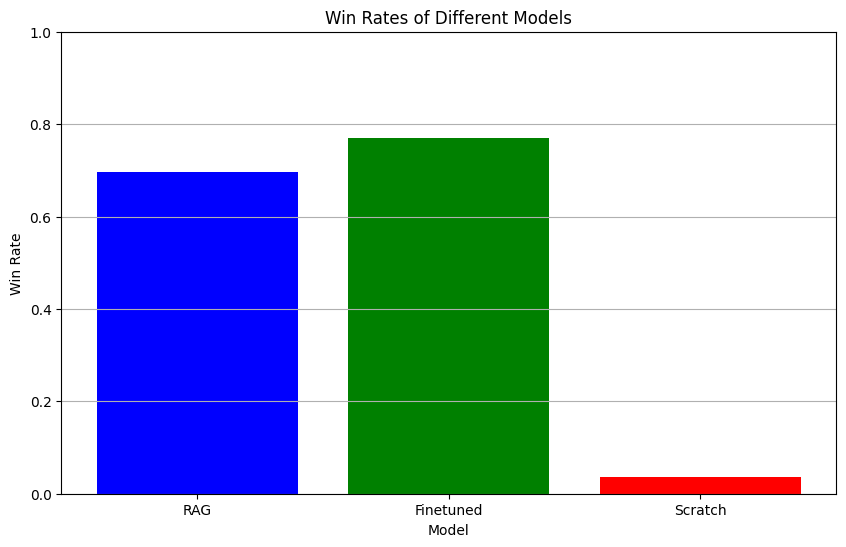

In [39]:
import matplotlib.pyplot as plt

# Plotting the win rates
plt.figure(figsize=(10, 6))
plt.bar(win_rates_df['Model'], win_rates_df['Win Rate'], color=['blue', 'green', 'red'])
plt.title('Win Rates of Different Models')
plt.xlabel('Model')
plt.ylabel('Win Rate')
plt.ylim(0, 1)  # Win rates range from 0 to 1
plt.grid(axis='y')

# Display the plot
plt.show()


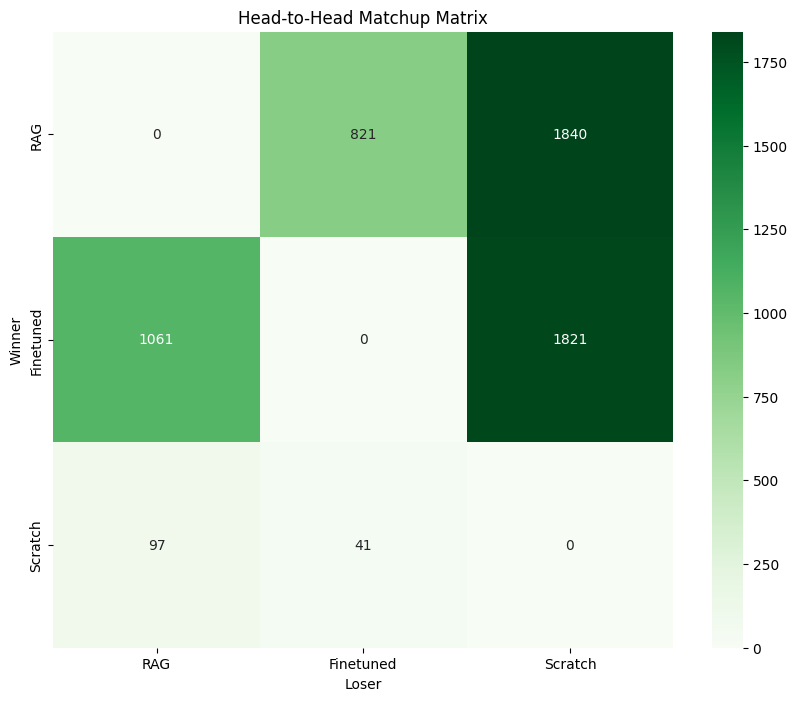

In [40]:
import seaborn as sns

# Creating a confusion matrix for the matchups
# Initialize a matrix with zeros
matchup_matrix = pd.DataFrame(0, index=models, columns=models)

# Populate the matrix with win counts
for i, row in df.iterrows():
    winner = row['whois_player_a'] if row['best_response'] == 'A' else row['whois_player_b']
    loser = row['whois_player_b'] if row['best_response'] == 'A' else row['whois_player_a']
    matchup_matrix.loc[winner, loser] += 1

# Creating a heatmap from the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(matchup_matrix, annot=True, cmap="Greens", fmt='g')
plt.title('Head-to-Head Matchup Matrix')
plt.xlabel('Loser')
plt.ylabel('Winner')
plt.show()


In [52]:
z = 1.96  # 95% confidence interval

import seaborn as sns

# Filter out rows where best_response is "None"
df_filtered = df[df['best_response'] != "None"].reset_index(drop=True)

# Modified function to also return total matches
def calculate_win_rate_and_total_matches(df, player):
    total_matches = df[(df['whois_player_a'] == player) | (df['whois_player_b'] == player)]
    wins = total_matches[((df['whois_player_a'] == player) & (df['best_response'] == 'A')) | 
                         ((df['whois_player_b'] == player) & (df['best_response'] == 'B'))]
    if len(total_matches) == 0:
        return 0, 0
    win_rate = len(wins) / len(total_matches)
    return win_rate, len(total_matches)

# Calculate win rates and total matches for each model
models = pd.unique(df_filtered[['whois_player_a', 'whois_player_b']].values.ravel('K'))
win_rates_real = {model: calculate_win_rate_and_total_matches(df_filtered, model) for model in models}

# Calculate 95% confidence intervals using the real total matches
ci_real = {}
for model, (win_rate, total_matches) in win_rates_real.items():
    margin_error = z * np.sqrt((win_rate * (1 - win_rate)) / total_matches)
    ci_real[model] = (win_rate - margin_error, win_rate + margin_error)

# Prepare the data for real plotting
models_real = list(win_rates_real.keys())
win_rates_real_values = [win_rates_real[model][0] for model in models_real]
total_matches_real_values = [win_rates_real[model][1] for model in models_real]
lower_bounds_real = [ci_real[model][0] for model in models_real]
upper_bounds_real = [ci_real[model][1] for model in models_real]

/tmp/ipykernel_29769/2626196518.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wins = total_matches[((df['whois_player_a'] == player) & (df['best_response'] == 'A')) |
/tmp/ipykernel_29769/2626196518.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wins = total_matches[((df['whois_player_a'] == player) & (df['best_response'] == 'A')) |
/tmp/ipykernel_29769/2626196518.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wins = total_matches[((df['whois_player_a'] == player) & (df['best_response'] == 'A')) |


In [ ]:
import numpy as np

# Plot with real values
plt.figure(figsize=(10, 6))
y_pos_real = np.arange(len(models_real))
plt.barh(y_pos_real, win_rates_real_values, color='#4055C8', xerr=[win_rates_real_values - np.array(lower_bounds_real), np.array(upper_bounds_real) - win_rates_real_values], capsize=5)
plt.yticks(y_pos_real, models_real)
plt.xlabel('Win Rate')
plt.title('Model Win Rates with 95% Confidence Intervals')
plt.grid(axis='x')
plt.show()

# Reattempting to create the heatmap with adjusted text sizes for better readability
plt.figure(figsize=(12, 10))
sns.heatmap(matchup_matrix, annot=True, cmap="coolwarm", fmt='g', annot_kws={'size': 24})
plt.title('Head-to-Head Matchup Matrix', fontsize=20)
plt.xlabel('Loser', fontsize=16)
plt.ylabel('Winner', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('./head_to_head_heatmap_transparent.png', bbox_inches='tight', transparent=True)

plt.show()


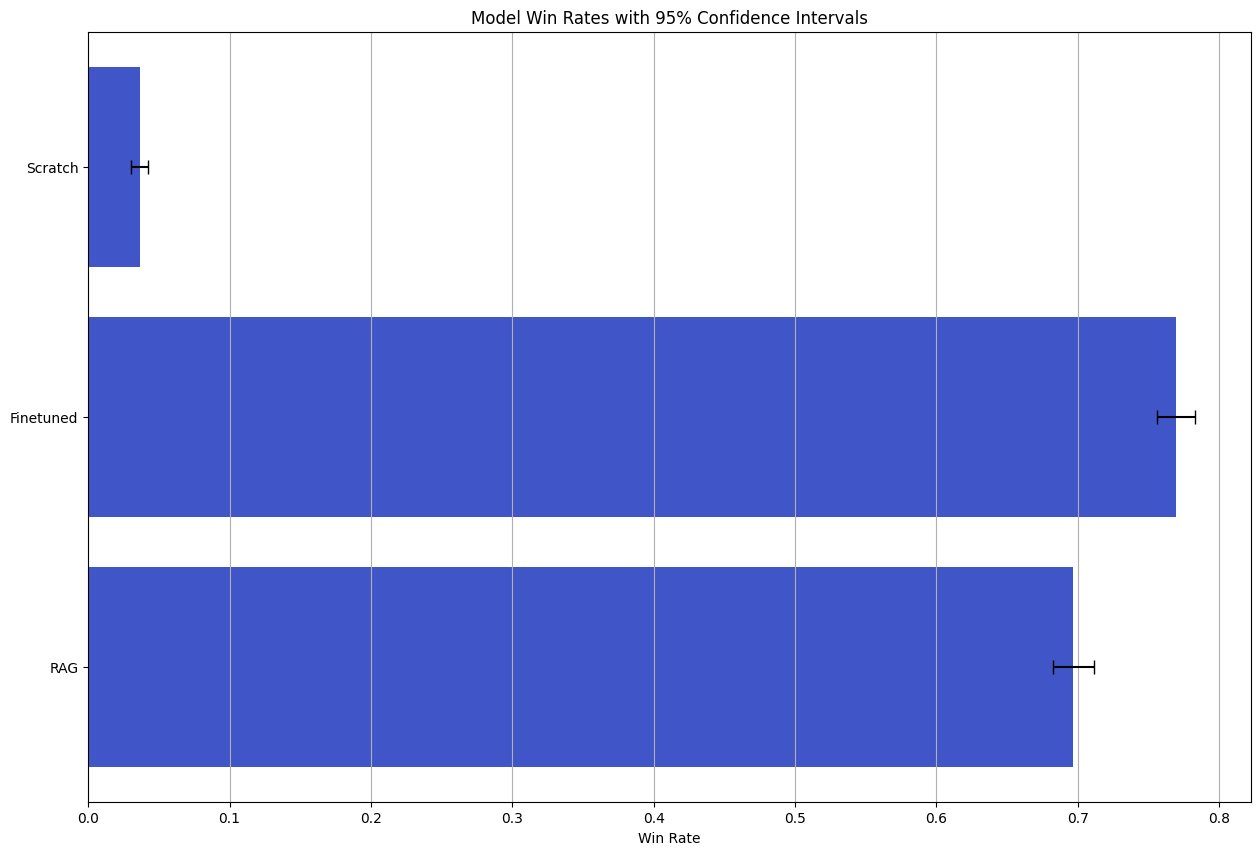

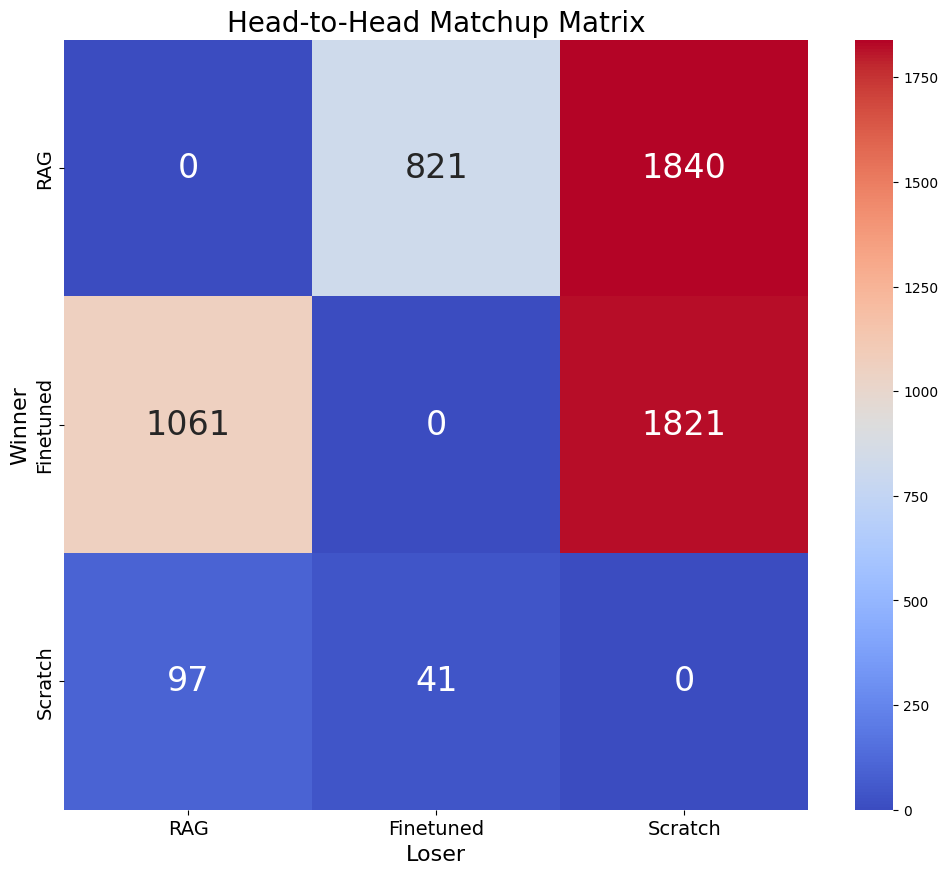

In [67]:
import numpy as np

# Plot with real values
plt.figure(figsize=(15, 10))
y_pos_real = np.arange(len(models_real))
plt.barh(y_pos_real, win_rates_real_values, color='#4055C8', xerr=[win_rates_real_values - np.array(lower_bounds_real), np.array(upper_bounds_real) - win_rates_real_values], capsize=5)
plt.yticks(y_pos_real, models_real)
plt.xlabel('Win Rate')
plt.title('Model Win Rates with 95% Confidence Intervals')
plt.grid(axis='x')
plt.show()

# Reattempting to create the heatmap with adjusted text sizes for better readability
plt.figure(figsize=(12, 10))
sns.heatmap(matchup_matrix, annot=True, cmap="coolwarm", fmt='g', annot_kws={'size': 24})
plt.title('Head-to-Head Matchup Matrix', fontsize=20)
plt.xlabel('Loser', fontsize=16)
plt.ylabel('Winner', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('./head_to_head_heatmap_transparent.png', bbox_inches='tight', transparent=True)

plt.show()


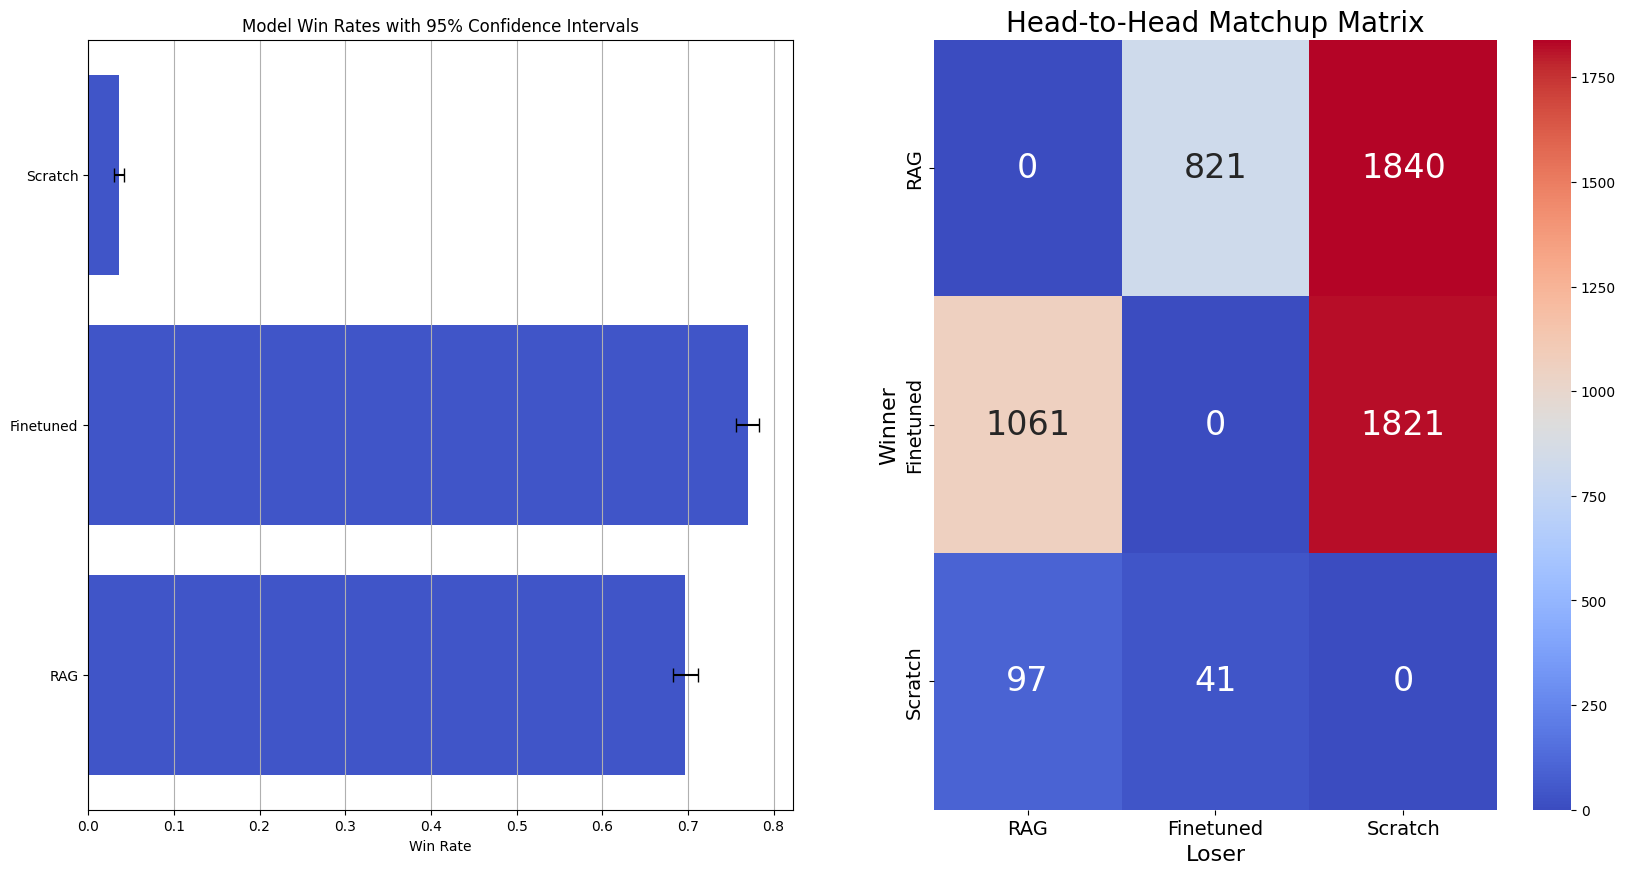

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# # Sample data for demonstration purposes
# models_real = ['Model A', 'Model B', 'Model C']
# win_rates_real_values = [0.8, 0.75, 0.7]
# lower_bounds_real = [0.75, 0.7, 0.65]
# upper_bounds_real = [0.85, 0.8, 0.75]
# matchup_matrix = np.array([[0, 1, 2], [1, 0, 1], [2, 1, 0]])

# Create a figure with two subplots side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot with real values
y_pos_real = np.arange(len(models_real))
ax1.barh(y_pos_real, win_rates_real_values, color='#4055C8', 
         xerr=[win_rates_real_values - np.array(lower_bounds_real), 
               np.array(upper_bounds_real) - win_rates_real_values], 
         capsize=5)
ax1.set_yticks(y_pos_real)
ax1.set_yticklabels(models_real)
ax1.set_xlabel('Win Rate')
ax1.set_title('Model Win Rates with 95% Confidence Intervals')
ax1.grid(axis='x')

# Create the heatmap
sns.heatmap(matchup_matrix, annot=True, cmap="coolwarm", fmt='g', annot_kws={'size': 24}, ax=ax2)
ax2.set_title('Head-to-Head Matchup Matrix', fontsize=20)
ax2.set_xlabel('Loser', fontsize=16)
ax2.set_ylabel('Winner', fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=14)

# Save the heatmap with transparency (if needed)
plt.savefig('./head_to_head_heatmap_transparent.png', bbox_inches='tight', transparent=True)

plt.show()


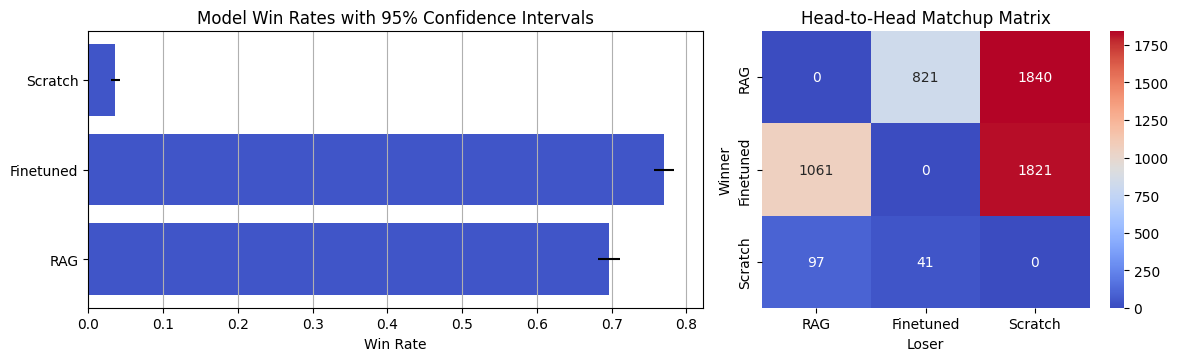

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

# # Sample data setup (you should replace these with your actual data)
# models_real = ['Model1', 'Model2', 'Model3']
# win_rates_real_values = [70, 80, 60]
# lower_bounds_real = [65, 75, 55]
# upper_bounds_real = [75, 85, 65]
# matchup_matrix = np.random.rand(3,3)

# Creating a single figure for both plots
plt.figure(figsize=(12, 3.72))  # Adjust the overall size to fit both plots

gs = gridspec.GridSpec(1, 2, width_ratios=[3, 2])  # Adjust the ratio here

# First plot: Bar chart
# plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
ax1 = plt.subplot(gs[0])
y_pos_real = np.arange(len(models_real))
plt.barh(y_pos_real, win_rates_real_values, color='#4055C8', 
         xerr=[win_rates_real_values - np.array(lower_bounds_real), 
               np.array(upper_bounds_real) - win_rates_real_values])#, 
        #  capsize=5)
plt.yticks(y_pos_real, models_real)
plt.xlabel('Win Rate')
plt.title('Model Win Rates with 95% Confidence Intervals')
plt.grid(axis='x')

# # Second plot: Heatmap
# plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot

# Second plot: Heatmap
ax2 = plt.subplot(gs[1])
sns.heatmap(matchup_matrix, annot=True, cmap="coolwarm", fmt='g')#, annot_kws={'size': 14})
plt.title('Head-to-Head Matchup Matrix')#, fontsize=20)
plt.xlabel('Loser')#, fontsize=16)
plt.ylabel('Winner',)# fontsize=16)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)

plt.savefig('./eval-results.png', bbox_inches='tight', transparent=True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

# Sample data setup (you should replace these with your actual data)
models_real = ['Model1', 'Model2', 'Model3']
win_rates_real_values = [70, 80, 60]
lower_bounds_real = [65, 75, 55]
upper_bounds_real = [75, 85, 65]
matchup_matrix = np.random.rand(3,3)

# Creating a single figure for both plots
plt.figure(figsize=(22, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 2])  # Adjust the ratio here

# First plot: Bar chart
ax1 = plt.subplot(gs[0])
y_pos_real = np.arange(len(models_real))
plt.barh(y_pos_real, win_rates_real_values, color='#4055C8', 
         xerr=[win_rates_real_values - np.array(lower_bounds_real), 
               np.array(upper_bounds_real) - win_rates_real_values], 
         capsize=5)
plt.yticks(y_pos_real, models_real)
plt.xlabel('Win Rate')
plt.title('Model Win Rates with 95% Confidence Intervals')
plt.grid(axis='x')

# Second plot: Heatmap
ax2 = plt.subplot(gs[1])
sns.heatmap(matchup_matrix, annot=True, cmap="coolwarm", fmt='g', annot_kws={'size': 14})
plt.title('Head-to-Head Matchup Matrix', fontsize=20)
plt.xlabel('Loser', fontsize=16)
plt.ylabel('Winner', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
